# Uczenie maszynowe - regresja liniowa wielu zmiennych

Stwórz model regresji liniowej dla cen mieszkań w Poznaniu. Zestaw danych to 5000 aktualnych opisów z serwisu _gratka.pl_.

Miarą błędu na danych testowych będzie średnia kwadratowa błędu (_Root Mean Squared Error, RMSE_) dla cen mieszkań:

$$ RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n\left(y_i-\hat{y}_i\,\right)^2} $$

## Dane

Plik `gratkapl.csv` zawiera dane, na których należy zbudować model regresyjny.
Pierwszy wiersz w pliku to nagłówek zawierający opisy kolumn.

* Id - numer porządkowy oferty
* Expected - cena mieszkania
* Rooms - liczba pokoi
* SqrMeters - metraż mieszkania w $m^2$
* Floor - piętro
* Location - dzielnica lub adres w Poznaniu
* Description - fragment opisu mieszkania

## Zadania:

1. Dokonaj analizy fragmentu danych treningowych:
    1. Dla pierwszych 500 mieszkań stwórz wykres złożony z trzech umieszczonych obok siebie wykresów punktowych ilustrujących po kolei korelację cech liczby pokoi, metrażu i piętra mieszkania z ceną mieszkań. Zadbaj o poprawne tytuły na osiach.
    1. W trzech zdaniach opisz wnioski (użyj komórki typu `markdown`).
    1. Powyższe dane są danymi rzeczywistymi, dlatego mogą zawierać szum w postaci odstających punktów (może być widoczny dopiero na większej liczbie danych). Opisz czy wystąpiły jakieś błędne dane, jeżeli tak, to jak wpływają na zależności cech oraz jak je usunięto.

2. Oblicz RMSE na części dostępnych danych:
    1. Podziel dane na dwie części, po 4000 i 1000 elementów.
    1. Za pomocą wybranej metody optymalizacyjnej zbuduj model regresyjny (korzystając z trzech cech liczbowych) dla pierwszej większej cześci danych.
    1. Zastosuj tak stworzony model (parametry $\theta$) do drugiej mniejszej części danych i oblicz dla nich RMSE. Eksperymentuj z doborem wartości $\alpha$ i $\epsilon$.
    
3. Dla tego samego podziału danych uzyskaj jak najmniejszy RMSE, eksperymentując z doborem cech:
    1. Oprócz oczywistych cech numerycznych jak metraż, cechy mogą być symbolicznymi cechami opisującymi występowanie wyrazów lub kombinacjami kilku cech. Zaprojektuj co najmniej trzy nowe cechy i krótko je opisz (wykorzystaj komórkę typu `markdown`). 
    1. Dla pierwszej części danych z poprzedniego zadania wyciągnij/oblicz nowe cechy, tj. do macierzy z danymi dodaj nowe kolumny dla nowych cech.


1. Stwórz model regresyjny na podziale danych z poprzedniego zadania, wykorzystujący dodatkowo nowe cechy. Oblicz nowy RMSE i porównaj go z poprzednim wynikiem. Eksperymentuj z doborem wartości $\alpha$ i $\epsilon$. Krótko opisz wyniki. Które cechy okazały się najbardziej przydatne?

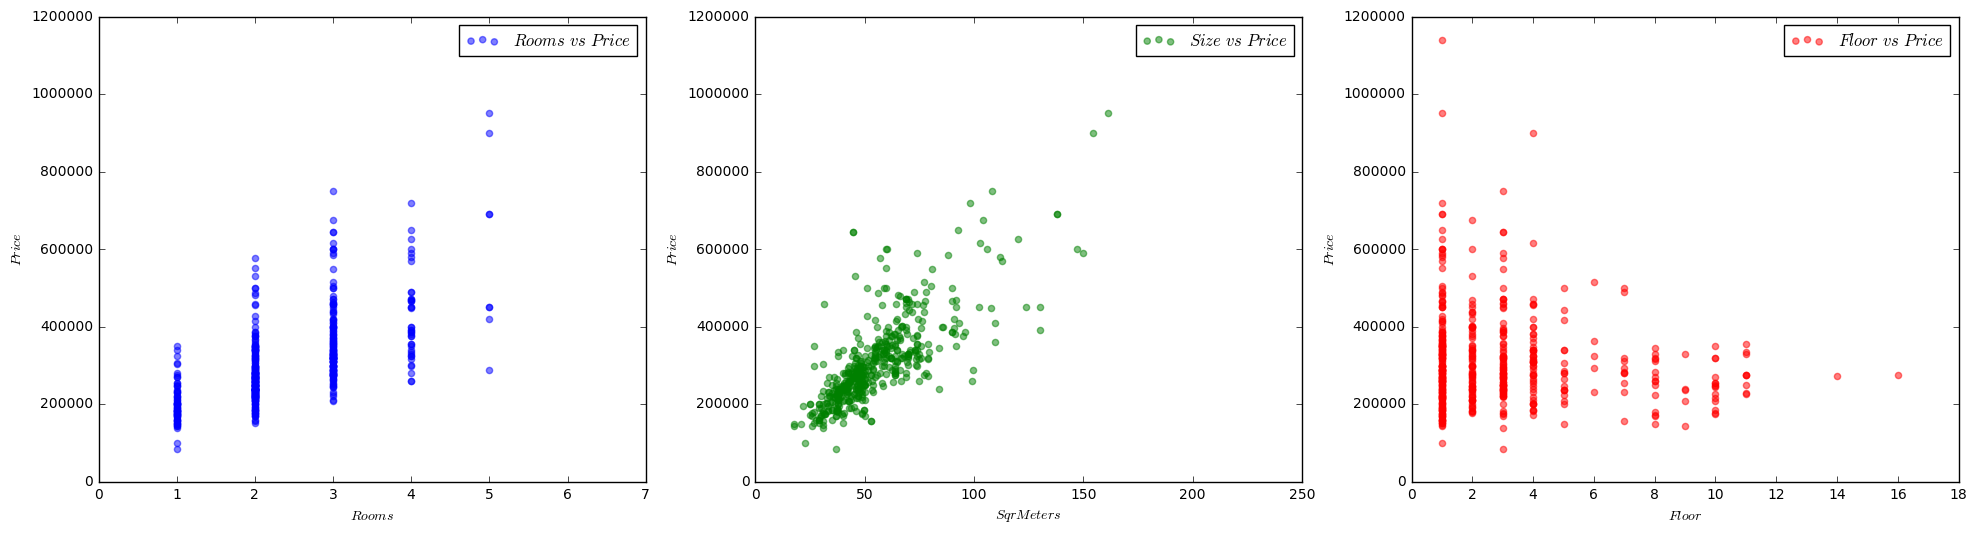

In [397]:
import pandas 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

data_all = pandas.read_csv("gratkapl.csv", encoding="utf")
data = data_all.head(n=500)

# Dla pierwszych 500 mieszkań stwórz wykres złożony z trzech umieszczonych obok siebie wykresów punktowych ilustrujących 
#po kolei korelację cech liczby pokoi, metrażu i piętra mieszkania z ceną mieszkań. Zadbaj o poprawne tytuły na osiach.


#zad.1a
fig = plt.figure(figsize=(24, 6))

ax = fig.add_subplot(131)    
ax.scatter(data['Rooms'], data['Expected'] , color='blue', alpha = 0.5, label='$Rooms$ $vs$ $Price$')
ax.legend()
ax.set_xlabel('$Rooms$')
ax.set_ylabel('$Price$')

bx = fig.add_subplot(132)    
bx.scatter(data['SqrMeters'], data['Expected'] , color='green', alpha = 0.5, label='$Size$ $vs$ $Price$')
bx.legend()
bx.set_xlabel('$SqrMeters$')
bx.set_ylabel('$Price$')

cx = fig.add_subplot(133)    
cx.scatter(data['Floor'], data['Expected'] , color='red', alpha = 0.5, label='$Floor$ $vs$ $Price$')
cx.legend()
cx.set_xlabel('$Floor$')
cx.set_ylabel('$Price$')

plt.show()

# Wnioski z wykresów

Wykres zależności ceny od liczby pokoi jest dyskretny, wykazuje lekkie tendencje wzrostowe.

Wykres zależności ceny od powierzchni jest bardzo skupiony, wraz ze wzrostem powierzchni rośnie też cena. 

Ostatni wykres obrazuje zależność ceny od piętra i tu wyrażnie widzimy, że wraz ze wzrostem wysokości, wartość mieszkania spada.  


# Szumy w danych

W danych możemy zaobserwować kilka wartości znacząco odbiegających cenowo od reszty - zarówno dużo niższych (np 4000 zł) oraz wielokrotnie wyższych. 

Do usunięcia szumów użyłam odchylenia standardowego. Z materiałów, do których udało mi się dotrzeć wynikało, że zazwyczaj ogranicza się dane przez zakres równy dwukrotności odchylenia standardowego plus średni wartości. Jednak w przypadku naszych danych, RMSE było zawsze znacznie niższe gdy zamiast dwurkotności, wzięliśmy tylko jednokrotność odchylenia. Jako że nie pociągało to za sobą znaczącej straty danych (0.2 %), zdecydowałam się na takie własnie ograniczenie.  


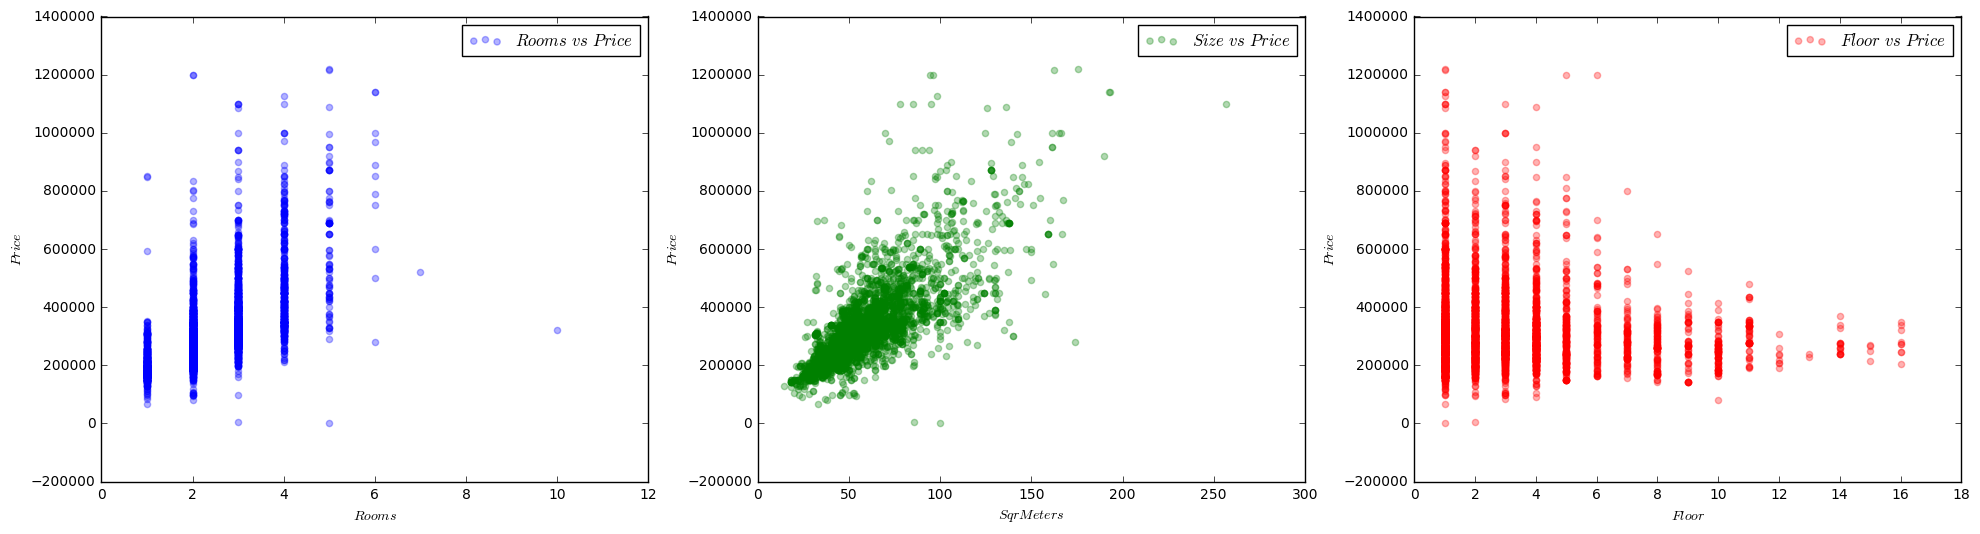

In [398]:
#zad.1c
#denoising using standard deviation
data_all = data_all[np.abs(data_all['Expected'] - data_all['Expected'].mean() < data_all['Expected'].std())]

#graphs after denoising
fig_temp = plt.figure(figsize=(24, 6))
ax_temp = fig_temp.add_subplot(131)    
ax_temp.scatter(data_all['Rooms'], data_all['Expected'] , color='blue', alpha = 0.3, label='$Rooms$ $vs$ $Price$')
ax_temp.legend()
ax_temp.set_xlabel('$Rooms$')
ax_temp.set_ylabel('$Price$')

bx_temp = fig_temp.add_subplot(132)    
bx_temp.scatter(data_all['SqrMeters'], data_all['Expected'] , color='green', alpha = 0.3, label='$Size$ $vs$ $Price$')
bx_temp.legend()
bx_temp.set_xlabel('$SqrMeters$')
bx_temp.set_ylabel('$Price$')

cx_temp = fig_temp.add_subplot(133)    
cx_temp.scatter(data_all['Floor'], data_all['Expected'] , color='red', alpha = 0.3, label='$Floor$ $vs$ $Price$')
cx_temp.legend()
cx_temp.set_xlabel('$Floor$')
cx_temp.set_ylabel('$Price$')

plt.show()


In [399]:
from sklearn.metrics import mean_squared_error

def hMx(theta, X):
    return X*theta

def JMx(theta,X,y):
    m = len(y)
    J = 1.0/(2.0*m)*((X*theta-y).T*(X*theta-y))
    return J.item()

def norm(X,y):
    return (X.T*X)**-1*X.T*y

def RMSE(y, y_pred):
    return(mean_squared_error(y, y_pred)**0.5)

# Dodane zmienne:
* Dzielnica, (zmienna 'Weight') - początkowo próbowałam rzeczywiście nadać dzielnicom wagi, korzystając z informacji o cenach mieszkań w poszczególnych dzielnicach, ale nie wpłynęło to znacząco na wynik. Obecnie każdej dzielnicy został przyporządkowany inny numer
* Średni rozmiar pokoju, czyli podzielenie rozmiaru mieszkania przez liczbę pokoi
* Pierwiastek z powierzchni mieszkania
* Przemnożona wartość powierzchni przez piętro

In [400]:
#zad.3 - nowe zmienne
pd.options.mode.chained_assignment = None

df = pandas.DataFrame(data_all['Location'].str.split(' ').tolist())
df = df[1]
x = df.unique()
#print(x)

Dict = {}
for i in range(x.size):
    Dict[x[i]] = i


data_all['Weight'] = pandas.DataFrame(df)

data_all['Weight'] = data_all['Weight'].map(Dict)
data_all['Size'] = data_all['SqrMeters']/data_all['Rooms']
data_all['SqrMeters_sqrt'] = np.sqrt(data_all['SqrMeters'])
data_all['SqrMeters_floor'] = data_all['SqrMeters']*data_all['Floor']

# Regresje zad.2 i zad.3

In [401]:
#zad.2
from sklearn.cross_validation import train_test_split
from IPython.display import display, Math, Latex

#Oblicz RMSE na części dostępnych danych: Podziel dane na dwie części, po 4000 i 1000 elementów.
train, test = train_test_split(data_all, test_size = 0.2)

#Za pomocą wybranej metody optymalizacyjnej zbuduj model regresyjny dla pierwszej większej cześci danych.
m, _ = train.shape 
n = 3
np1 = n + 1
Xn = (train[['Rooms', 'SqrMeters', 'Floor']]).as_matrix()

XMx = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m,np1)
yMx = np.matrix(train['Expected'].as_matrix()).reshape(m,1)

thetaNorm = norm(XMx, yMx)

display(Math(r'\Large J(\theta) = %.4f' % JMx(thetaNorm, XMx, yMx)))


<IPython.core.display.Math object>

In [402]:
#2c
#Zastosuj tak stworzony model (parametry  θθ ) do drugiej mniejszej części danych i oblicz dla nich RMSE. 
#Eksperymentuj z doborem wartości 

m, _ = test.shape 
n = 3
np1 = n + 1
Xn_test = (test[['Rooms', 'SqrMeters', 'Floor']]).as_matrix()

XMx_test = np.matrix(np.concatenate((np.ones((m, 1)), Xn_test), axis=1)).reshape(m,np1)
yMx_test = np.matrix(test['Expected'].as_matrix()).reshape(m,1)

display(Math(r'\Large RMSE = %.4f' % RMSE(yMx_test, hMx(thetaNorm, XMx_test))))
# the best result was RMSE=74424.4409

<IPython.core.display.Math object>

In [403]:
#zad.3
from sklearn.cross_validation import train_test_split
from IPython.display import display, Math, Latex


#Za pomocą wybranej metody optymalizacyjnej zbuduj model regresyjny dla pierwszej większej cześci danych.
m, _ = train.shape 
n = 7
np1 = n + 1
Xn = (train[['Rooms', 'SqrMeters', 'Floor', 'Weight', 'SqrMeters_floor', 'SqrMeters_sqrt', 'Size']]).as_matrix()

XMx = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m,np1)
yMx = np.matrix(train['Expected'].as_matrix()).reshape(m,1)

thetaNorm = norm(XMx, yMx)

display(Math(r'\Large J(\theta) = %.4f' % JMx(thetaNorm, XMx, yMx)))


<IPython.core.display.Math object>

In [404]:
#zad. 3
#Zastosuj tak stworzony model (parametry  θθ ) do drugiej mniejszej części danych i oblicz dla nich RMSE. 
#Eksperymentuj z doborem wartości 

m, _ = test.shape 
n = 7
np1 = n + 1
Xn_test = (test[['Rooms', 'SqrMeters', 'Floor', 'Weight', 'SqrMeters_floor', 'SqrMeters_sqrt', 'Size']]).as_matrix()

XMx_test = np.matrix(np.concatenate((np.ones((m, 1)), Xn_test), axis=1)).reshape(m,np1)
yMx_test = np.matrix(test['Expected'].as_matrix()).reshape(m,1)

display(Math(r'\Large RMSE = %.4f' % RMSE(yMx_test, hMx(thetaNorm, XMx_test))))


<IPython.core.display.Math object>


# Wnioski z dodania nowych zmiennych

Każda ze zmiennych ma niestety tak samo niski wpływ na RMSE. Największa różnica, jaką udało mi się uzyskać to niewiele ponad 1000. 

Niestety nie udało mi się stworzyć zmiennej, która rzeczywiście znacząco zmieniłaby wynik modelu. 
Zaskoczył mnie mały wpływ dzielnicy oraz zmiennych, które mają rozkład zbliżony do funkcji liniowej (np. powierzchnia * piętro). Rzeczywiście największy wpływ miała chyba dzielnica, ale w zależności od wylosowania podziału na dane testowe i treningowe, potrafiła zarówno zawyżyć wynik, jak i go obniżyć.
